In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
sns.set_theme(context='notebook', 
                  style='darkgrid', 
                  palette='deep',
                  font='sans-serif', 
                  font_scale=1, 
                  color_codes=True, 
                  rc=None)

 #  Мексиканская дуэль
В вершинах правильного тетраэдра стоят мексиканцы (по одному в каждой вершине). В некоторый момент времени они одновременно стреляют вдоль случайного ребра из своей вершины. Какова вероятность того, что какие-то двое мексиканцев попадут друг в друга?


In [2]:
%%time
ans = []
# Для каждого стрелка создадим список его соседей
lst_1 = [2, 3, 4]
lst_2 = [1, 3, 4]
lst_3 = [1, 2, 4]
lst_4 = [1, 2, 3]

for i in range(1_000_000):
# Случайным образом выбираем кто в кого будет стрелять
    p1 = np.random.choice(lst_1, size = 1) 
    p2 = np.random.choice(lst_2, size = 1)
    p3 = np.random.choice(lst_3, size = 1) 
    p4 = np.random.choice(lst_4, size = 1)
# Если есть хотя бы 1 пара, фиксируем попадание
    if ((p1 == 2 and p2 == 1) or
        (p1 == 3 and p3 == 1) or
        (p1 == 4 and p4 == 1) or
        (p2 == 3 and p3 == 2) or 
        (p2 == 4 and p4 == 2) or
        (p4 == 3 and p3 == 4)):
        ans.append(1)
    else:
        ans.append(0)
print(np.mean(ans))

0.629817
Wall time: 56.6 s


# Монетки 1
Сколько раз в среднем нужно бросить монетку, чтобы выпало два орла/решки подряд?

In [3]:
%%time
ans = []
tmp = []
coin = [0, 1]
for i in range(10000):
    tmp += list(np.random.choice(coin, size=2, replace=True))
    while tmp[-1] != tmp[-2]:
        tmp += list(np.random.choice(coin, size=1))
    ans.append(len(tmp))
    tmp = []
np.mean(ans)

Wall time: 292 ms


2.9867

# Монетки 2
* n - число подброшенных абсолютно одинаковых монет (независимо)
* m - число решек, которые нас интересуют

Найти вероятность выпадения **ровно** m решек при броске n монет

In [18]:
n = 10
m = 3
coin = [0, 1]
ans = []
for _ in range(100000):
    ans.append(sum(np.random.choice(coin, size=n, replace=True)) == m)
np.mean(ans)

0.11807

# Монетки 3
* n - число подброшенных абсолютно одинаковых монет (независимо)
* m - число решек, которые нас интересуют

Найти вероятность выпадения **не менее** m решек при броске n монет

In [5]:
n = 10
m = 5
coin = [0, 1]
ans = []
for _ in range(100000):
    ans.append(sum(np.random.choice(coin, size=n, replace=True)) <= m)
np.mean(ans)

0.62039

# Муравьи и треугольник
На каждой из трех вершин треугольника сидит муравей. Какова вероятность
столкновения (на любой из сторон), если муравьи начнут ползти по сторонам
треугольника? Предполагается, что каждый муравей выбирает направление
случайным образом, вероятность выбора направлений одинакова и все муравьи
ползут с одинаковой скоростью.

In [6]:
%%time
ans = []
for i in range(100_000):
    directions = [np.random.randint(0, 2) for _ in range(3)]
    if len(set(directions)) == 1:
        ans.append(1)
    else:
        ans.append(0)
np.mean(ans)   

Wall time: 556 ms


0.24915

# Кубики 1
Сколько раз в среднем нужно бросить кубик, чтобы выпало две шестерки подряд?

In [7]:
ans = []
tmp = []
dice = [1, 2, 3, 4, 5, 6]
for i in range(100_000):
    tmp += list(np.random.choice(dice, size=2, replace=True))
    while tmp[-1] + tmp[-2] != 12:
        tmp += list(np.random.choice(dice, size=1))
    ans.append(len(tmp))
    tmp = []
np.mean(ans)

42.03631

# Кубики 2
В мешке лежат три кубика: 6-гранный, 12-гранный, 20-гранный. Мы достали
один кубик наудачу, подкинули его и на нем выпало 4. Какова вероятность,
что если мы также достанем и подкинем один из оставшихся в мешке
кубиков, на нем выпадет меньше?

In [10]:
ans = []
n = 4

for i in range(100_000):
    lst = [6, 12, 20]
    np.random.shuffle(lst)
    lst.pop()
    np.random.shuffle(lst)
    s = lst.pop()
    p = np.random.choice(range(1, s + 1), size = 1)
    ans.append(p < n)
np.mean(ans)

0.29968

In [11]:
1/3*(1/2*(3/12 + 3/20)) + 1/3*(1/2*(3/6 + 3/20)) + 1/3*(1/2*(3/6 + 3/12))

0.3

# Кубики 3
В D&D используются самые разные "кубики" для моделирования какого-то действия. С 4, 6, 8, 10, 12, 20 и даже особое устройство, со 100 гранями.
Найти вероятность выпадения грани 1 

In [12]:
n = 6
dice = [i for i in range(1, n + 1)]
sample = np.random.choice(dice, size = 100000)
np.count_nonzero(sample == 1) / sample.size

0.16496

# "Китайский" лутбокс
В лутбоксе находится N предметов, один из которых особенный.
Если выпал обычный предмет, то общее число доступных предметов станет N-1.
После получения особенного предмета лутбокс меняется на новый.
Нужно найти мат ожидание количества открытий для получения K особенных предметов

In [16]:
ans = []
n = 99
k = 2
lootbox = [0]*n + [1]
for i in range(10000):
    cnt_open = 1
    cnt_success = 0
    while cnt_success < 2:
        if lootbox.pop(np.random.randint(0, len(lootbox))) == 1:
            cnt_success += 1
            if cnt_success == k:
                ans.append(cnt_open)
            lootbox = [0]*n + [1]
        cnt_open += 1
np.mean(ans)

101.0059

# Cтол без ножек
Есть круглый стол без ножек.
Какова вероятность, что если поставить 3 ножки по краям столешницы, то стол устоит?

In [14]:
def in_polygon(xp, yp, x=0, y=0):
    inside = 0
    for i in range(len(xp)):
        if (((yp[i]<=y and y<yp[i-1]) or (yp[i-1]<=y and y<yp[i])) and 
            (x > (xp[i-1] - xp[i]) * (y - yp[i]) / (yp[i-1] - yp[i]) + xp[i])): 
            inside = 1 - inside    
    return inside


ans = []
for _ in range(100000):
    xp = []
    yp = []
    for _ in range(3):
        x = np.random.uniform(low=-1, high=1)
        y = (-1)**np.random.randint(1, 3) * (1 - x**2)**0.5
        xp.append(x)
        yp.append(y)
    ans.append(in_polygon(xp, yp))
np.mean(ans)

0.25063

# Карты
На вход подаётся строка из символов-карт. Гарантируется, что в ней есть все 4 туза ровно по 1 экземпляру, однако остальные карты могут отсутствовать или дублироваться.

Колода хорошо равномерно перемешивается.

Какова вероятность, что все 4 туза в ней идут подряд (не важно в каком порядке)?

In [15]:
def check():
    np.random.shuffle(deck)
    return '1111' in ''.join(deck)

aces = ['🂡','🂱','🃁','🃑']
str_deck = '🂡🂦🂧🂨🂩🂪🂫🂭🂮🂱🂶🂷🂸🂹🂺🂻🂽🂾🃁🃆🃇🃈🃉🃊🃋🃍🃎🃑🃖🃗🃘🃙🃚🃛🃝🃞'

deck = ['1' if card in aces else '0' for card in str_deck]

np.mean([check() for _ in range(100000)])           

0.00049

# Конверсии
Конверсия из клика в регистрацию составляет 4%, конверсия из регистрации в лид (целевое действие пользователя) 30%. Какова вероятность, что из 60 кликнувших пользователей мы получим хотя бы 1 лид?

In [94]:
ans = []
for _ in range(100000):
    cr_one = np.random.choice(a=[1, 0], size=60, replace=True, p=[0.04, 0.96])
    cr_two = np.random.choice(a=[1, 0], size=sum(cr_one), replace=True, p=[0.3, 0.7])
    ans.append(cr_two.sum() > 0)

In [95]:
np.mean(ans)

0.51378

In [96]:
1 - (1 - 0.04 * 0.3)**60

0.5153628798933746

# Парадокс дней рождения
Определить вероятность того, что в группе, состоящей из N человек, у двух людей будет совпадение дней рождения (число и месяц).

In [8]:
N = 23
res = []
for _ in range(10000):
    birthdays = [np.random.randint(1, 365, 1)[0] for _ in range(N)]
    res.append(sum(Counter(birthdays).values()) > len(Counter(birthdays)))
np.mean(res)

0.5026

# Экзамен 
Экзамен проходит по следующей схеме: если некоторый билет уже был вытянут, то после ответа экзаменатор откладывает его в сторону. Студент выучил 20 билетов из 30. Когда ему выгоднее идти, первым или вторым, чтобы вероятность вынуть выученный билет была больше?

In [22]:
p1 = round(2/3, 3)
res = []
for _ in range(10000):
    tickets = list(np.random.binomial(1, p=2/3, size = 30))
    np.random.shuffle(tickets)
    tickets.pop()
    res.append(np.random.choice(tickets) == 1)
p2 = round(np.mean(res), 3)
print(p1, p2)

0.667 0.664


# ДТП
Ночью произошло ДТП с участием такси. В городе работают две компании такси — «Синие» и «Зелёные». «Зелёным» принадлежит 85% такси, «Синим» 15%. Свидетель аварии утверждает, что такси принадлежало «Синим». Следственный эксперимент показал, что ночью свидетель верно определяет цвет такси в 80%. Какова вероятность того, что такси действительно принадлежало «Синим»?

In [26]:
res = []
for _ in range(10000):
    car = np.random.binomial(1, 0.15)
    ans = np.random.binomial(1, 0.8)
    if ans:        
        res.append((car, car))
    else:
        res.append((car, abs(1-car)))
t = pd.DataFrame(res, columns=['taxi','answer'])
t.groupby('answer')['taxi'].mean()

answer
0    0.043645
1    0.410126
Name: taxi, dtype: float64

# Баскетбол
Имеется баскетбольное кольцо, и  предлагается сыграть в одну из двух игр:

 * Игра 1: Есть один бросок в кольцо.

* Игра 2: Есть три попытки, но для победы потребуется не менее двух попаданий.

Если р - вероятность попадания в кольцо при броске, при каких значениях р
следует выбирать ту или иную игру?

In [72]:
p_shot = np.linspace(0, 1, 100)
p_win_one_shot = []
p_win_multi_shot = []
for p in p_shot:
    res_one_shot = [np.random.binomial(n=1, p=p, size=1) for _ in range(10000)]
    p_win_one_shot.append(np.mean(res_one_shot))         
    res_multi_shot = [np.random.binomial(n=3, p=p, size=1) >= 2 for _ in range(10000)]
    p_win_multi_shot.append(np.mean(res_multi_shot)) 

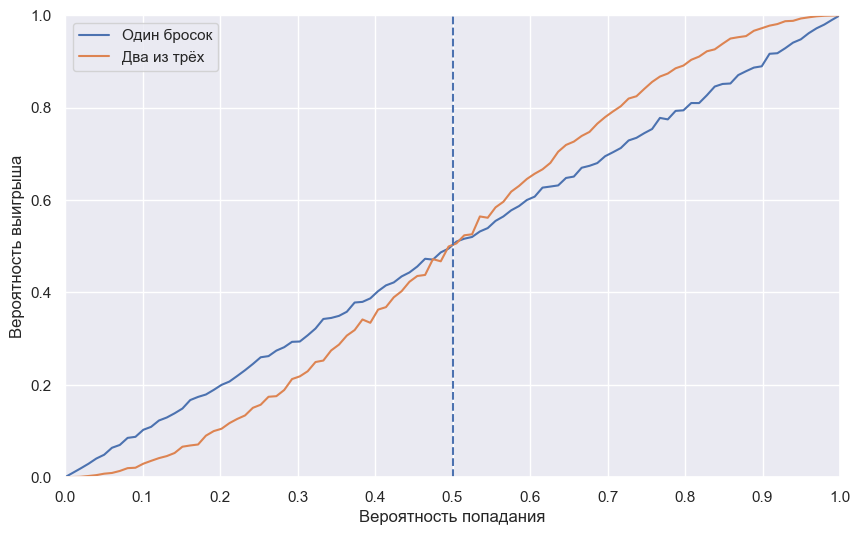

In [73]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=p_shot, y=p_win_one_shot, label = 'Один бросок')
sns.lineplot(x=p_shot, y=p_win_multi_shot, label = 'Два из трёх')
plt.vlines(x=0.5, ymin=0, ymax=1, linestyles='--')

plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Вероятность попадания')
plt.ylabel('Вероятность выигрыша')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [10]:
p_shot = np.linspace(0, 1, 100)
p_win = [ (3 * p**2 * (1-p)) + p**3 for p in p_shot ]

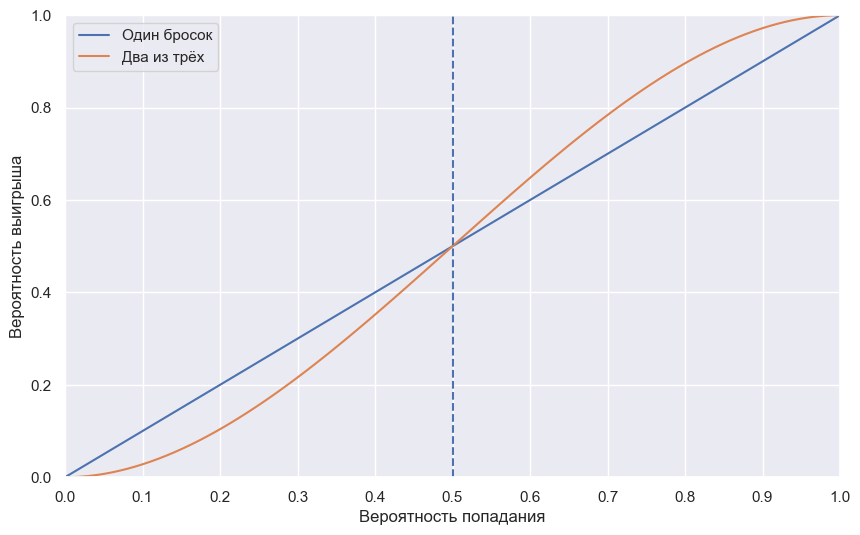

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=p_shot, y=p_shot, label = 'Один бросок')
sns.lineplot(x=p_shot, y=p_win, label = 'Два из трёх')
plt.vlines(x=0.5, ymin=0, ymax=1, linestyles='--')

plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Вероятность попадания')
plt.ylabel('Вероятность выигрыша')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

# Парадокс Монти Холла
Представьте, что вы стали участником игры, в которой вам нужно выбрать одну из трёх дверей. За одной из дверей находится автомобиль, за двумя другими дверями — козы. Вы выбираете одну из дверей, например, номер 1, после этого ведущий, который знает, где находится автомобиль, а где — козы, открывает одну из оставшихся дверей, например, номер 3, за которой находится коза. После этого он спрашивает вас — не желаете ли вы изменить свой выбор и выбрать дверь номер 2? Увеличатся ли ваши шансы выиграть автомобиль, если вы примете предложение ведущего и измените свой выбор?



In [7]:
# Дверь меняется
ans = []
all_doors = {0, 1, 2}

for _ in range(100000):
        
    prize = np.random.randint(low=0, high=3)
    first_choice = np.random.randint(low=0, high=3)
        
    available_to_open_doors = all_doors - {first_choice} - {prize}
    
    if len(available_to_open_doors) == 1:
        closed_doors = all_doors - available_to_open_doors
        final_choice = closed_doors - {first_choice}
    else:
        closed_doors = all_doors - {list(available_to_open_doors)[0]}
        final_choice = closed_doors  - {first_choice}
        
    if {prize} == final_choice:
        ans.append(1)
    else:
        ans.append(0)
print(np.mean(ans), 2/3)

0.66502 0.6666666666666666


In [8]:
# Дверь не меняется
ans = []
all_doors = {0, 1, 2}

for _ in range(100000):
        
    prize = np.random.randint(low=0, high=3)
    first_choice = np.random.randint(low=0, high=3)
        
    available_to_open_doors = all_doors - {first_choice} - {prize}
    
    if len(available_to_open_doors) == 1:
        closed_doors = all_doors - available_to_open_doors
        final_choice = {first_choice}
    else:
        closed_doors = all_doors - {list(available_to_open_doors)[0]}
        final_choice = {first_choice}
        
    if {prize} == final_choice:
        ans.append(1)
    else:
        ans.append(0)
print(np.mean(ans), 1/3)

0.33498 0.3333333333333333


# Последовательные выигрыши
Чтобы подбодрить сына, делающего успехи в игре в теннис, отец обещает ему приз, если он выиграет подряд по крайней мере две теннисные партии против своего отца и клубного чемпиона по одной из схем: отец - чемпион - отец или чемпион - отец - чемпион по выбору сына. Чемпион играет лучше отца. Какую схему следует выбрать сыну?

In [1]:
def check_win(games):
    return (games[0] + games[1] == 2) or (games[1] + games[2] == 2) or (games[0] + games[1] + games[2] == 3)

In [2]:
f = 0.7  # Вероятность обыграть отца
c = 0.3  # Вероятность обыграть чемпиона

In [9]:
#  Тактика FCF
ans = []
for _ in range(10000):
    game_1 = np.random.binomial(n=1, p=f, size=1)
    game_2 = np.random.binomial(n=1, p=c, size=1)
    game_3 = np.random.binomial(n=1, p=f, size=1)
    ans.append(check_win([game_1, game_2, game_3]))
np.mean(ans)

0.2685

In [10]:
#  Тактика CFC
ans = []
for _ in range(10000):
    game_1 = np.random.binomial(n=1, p=c, size=1)
    game_2 = np.random.binomial(n=1, p=f, size=1)
    game_3 = np.random.binomial(n=1, p=c, size=1)
    ans.append(check_win([game_1, game_2, game_3]))
np.mean(ans)

0.3489

# Легкомысленный член жюри
В жюри из трех человек два члена независимо друг от друга принимают правильное решение с вероятностью p, а третий для вынесения решения бросает монету (окончательное решение выносится большинством голосов). Жюри из одного человека выносит справедливое решение с вероятностью p. Какое из этих жюри выносит справедливое решение с большей вероятностью?

In [68]:
p_list = np.linspace(0, 1, 11)
p_exp = []
for p in p_list:
    ans = []
    for _ in range(10000):
        t1 = sum(np.random.choice(a=[0, 1], size=2, p=[1 - p, p]))  
        t2 = sum(np.random.choice(a=[0, 1], size=1, p=[0.5, 0.5]))
        ans.append((t1 + t2) >=2) 
    p_exp.append(np.mean(ans))

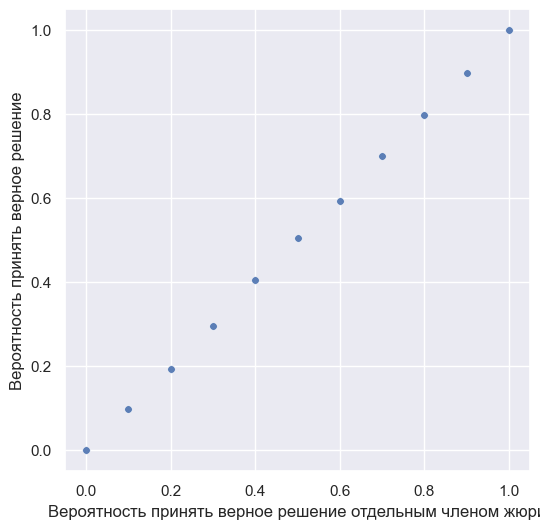

In [69]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=p_list, 
                y=p_exp, 
                s=30, 
                alpha=0.9)

plt.ylabel('Вероятность принять верное решение')
plt.xlabel('Вероятность принять верное решение отдельным членом жюри')
# plt.title('Разность метрик между группами')
plt.show()

# Выбор купонов
Купоны в коробках занумерованы цифрами от 1 до 5, и для того, чтобы выиграть, надо набрать полный комплект из пяти купонов с разными номерами. Если из коробки вынимается один купон, то сколько коробок в среднем надо испытать, чтобы получить полный комплект?

In [14]:
coupons = [1, 2, 3, 4, 5]
ans  = []
for _ in range(10000):
    my_set = set()
    cnt = 0
    while len(my_set) < 5:
        my_set.add(np.random.choice(a=coupons, size=1)[0])
        cnt += 1
    ans.append(cnt)
np.mean(ans)

11.4

In [6]:
5/5 + 5/4 + 5/3 + 5/2 + 5/1

11.416666666666668

# В театре
Восемь юношей и семь девушек независимо приобрели по одному билету в одном и том же театральном ряду, насчитывающем 15 мест. Какое среднее число смежных мест занимают в этом ряду пары?

In [19]:
row  = [1]*8 + [0]*7
ans = []
for _ in range(100000):
    t = []
    np.random.shuffle(row)
    for i in range(1, len(row)):
        t.append((row[i-1] + row[i]) == 1)
    ans.append(sum(t))
np.mean(ans)

7.46528